Complete the exercises below For **Assignment #3**.

## Linear model with one numerical variable

Execute the following cell to load the [ISLR2](https://cran.rstudio.com/web/packages/ISLR2/index.html) and [Tidverse](https://www.tidyverse.org/) packages.

In [1]:
library('tidyverse')
library('ISLR2')

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `ISLR2` package provides a dataset called `Boston` that we will use in this assignment.

In [2]:
Boston |> glimpse()

Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

🚨 Use the **Jupyter Lab Contextual Help Feature** to see the documentation for this data. 

❓ **In the markdown cell below, add definitions for the `lstat` and `medv` variables in the `Boston` data.** 

- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in $1000s.

Let's plot `medv` (y-axis) versus `lstat`.

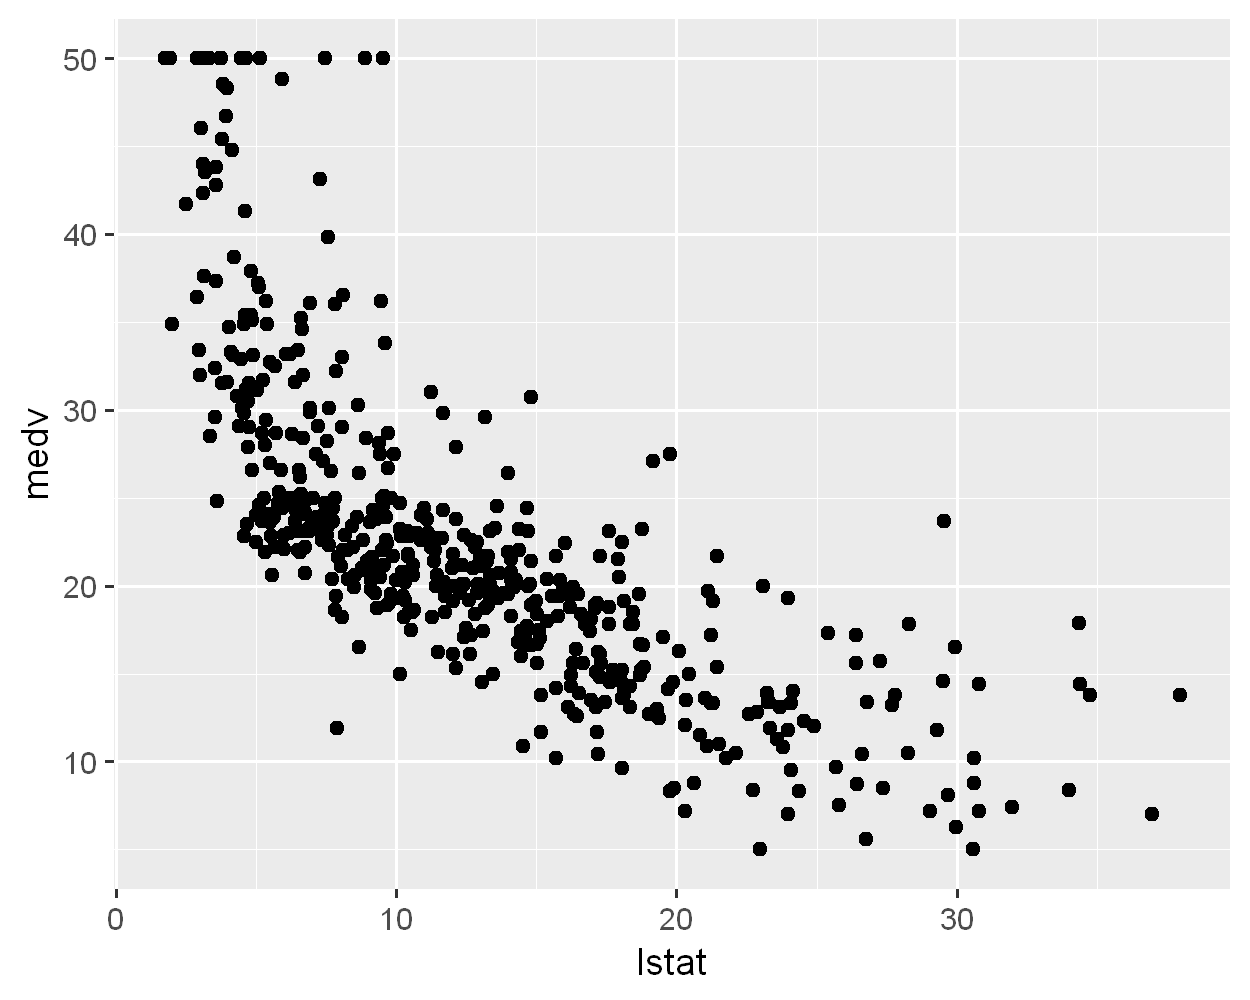

In [3]:
p = ggplot(Boston, aes(x = lstat, y = medv)) + geom_point()

p

❓Does the relationship appear to be positive or negative? Does it look to be reasonably linear?

**Answer:**

There does seem to be a negative relationship between the percent lower status and the median value of owner occupied homes. 

### Let's build a model!

We need to first load the [Tidymodels]() package.

In [4]:
library('tidymodels')

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.6     ✔ workflows    1.1.3
✔ modeldata    1.3.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.3.0
✔ recipes      1.0.9     

── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



First we specify our model as `linear regression` using the `lm` engine.

In [5]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


Next we "fit" our model by supplying the `formula` and the data.

In [6]:
mod_fit = mod |> fit(medv ~ lstat, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ lstat, data = data)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


### Get the regression table

In [7]:
# We can use the tidy function to get a table of our model information
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.5538409,0.56262735,61.41515,3.743081e-236
lstat,-0.9500494,0.03873342,-24.52790,5.081103e-88


❓Comparing on the chart above and the regression table, does the **sign** of the `estimate` for the `lstat` term coefficient fit your expectations?

**Answer:**

Yes a positive intercept with a negative slope fits a linear approximation to the scatter plot above. 

### Making predictions and visualizing the model

We can use the `augment` function to "predict" `medv` for all the values in our original dataset. We will capture these predictions in a new data frame called `Boston2`. The predicted values are found in the `.pred` column.

In [8]:
Boston2 = augment(mod_fit, Boston)

glimpse(Boston2)

Rows: 506
Columns: 15
$ .pred   <dbl> 29.822595, 25.870390, 30.725142, 31.760696, 29.490078, 29.6040…
$ .resid  <dbl> -5.8225951, -4.2703898, 3.9748580, 1.6393042, 6.7099222, -0.90…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

Let's visualize our model.

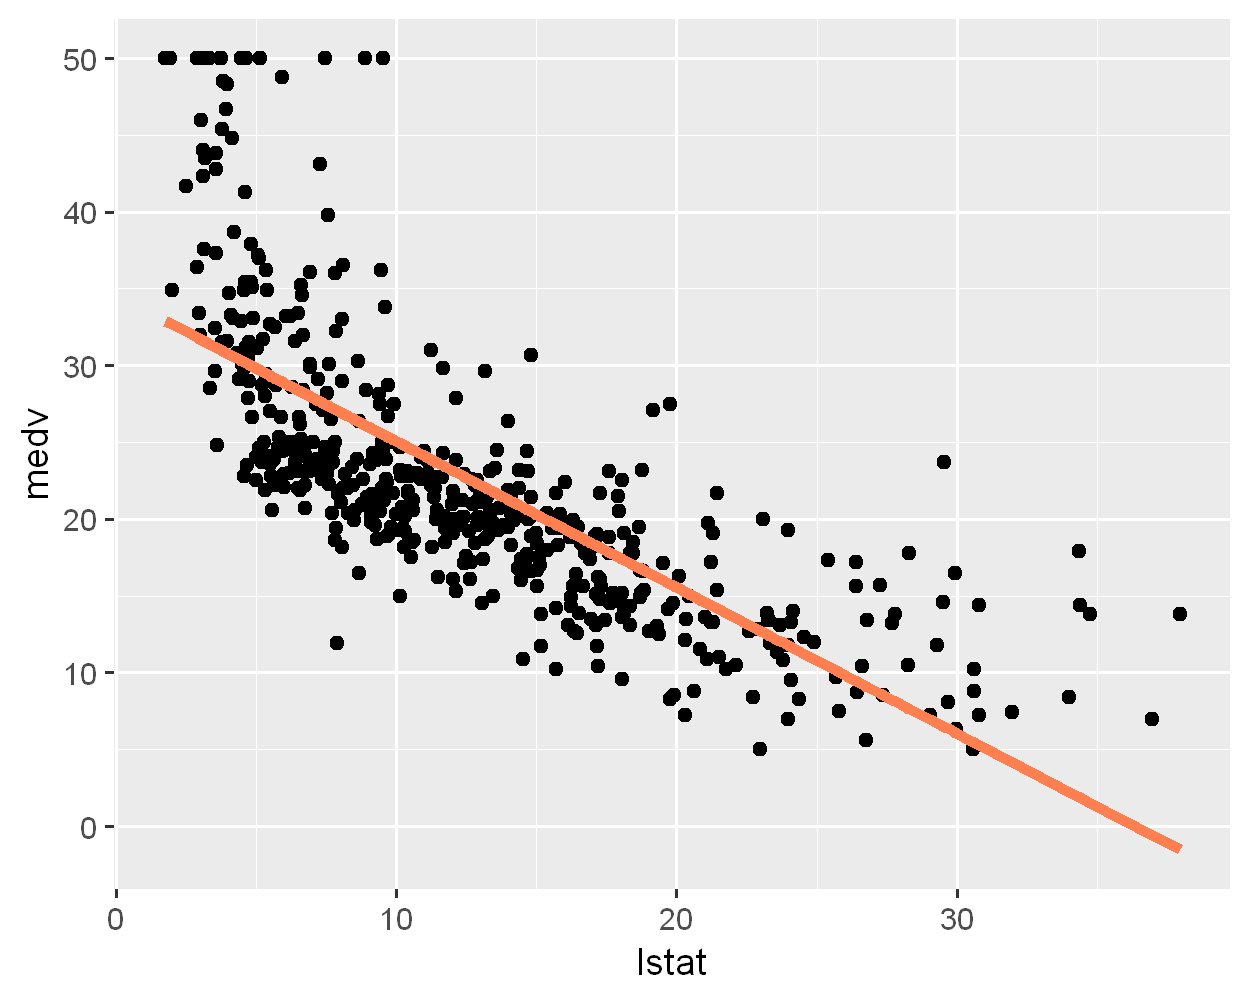

In [9]:
p = ggplot(Boston2, aes(x = lstat)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

### Put your skills to practice independently!

In cells below, build a model of `medv` with the `rm` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

In [10]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


In [11]:
mod_fit = mod |> fit(medv ~ rm, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ rm, data = data)

Coefficients:
(Intercept)           rm  
    -34.671        9.102  


In [12]:
Boston2 = augment(mod_fit, Boston)

glimpse(Boston2)

Rows: 506
Columns: 15
$ .pred   <dbl> 25.17575, 23.77402, 30.72803, 29.02594, 30.38215, 23.85594, 20…
$ .resid  <dbl> -1.1757458, -2.1740210, 3.9719677, 4.3740621, 5.8178479, 4.844…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

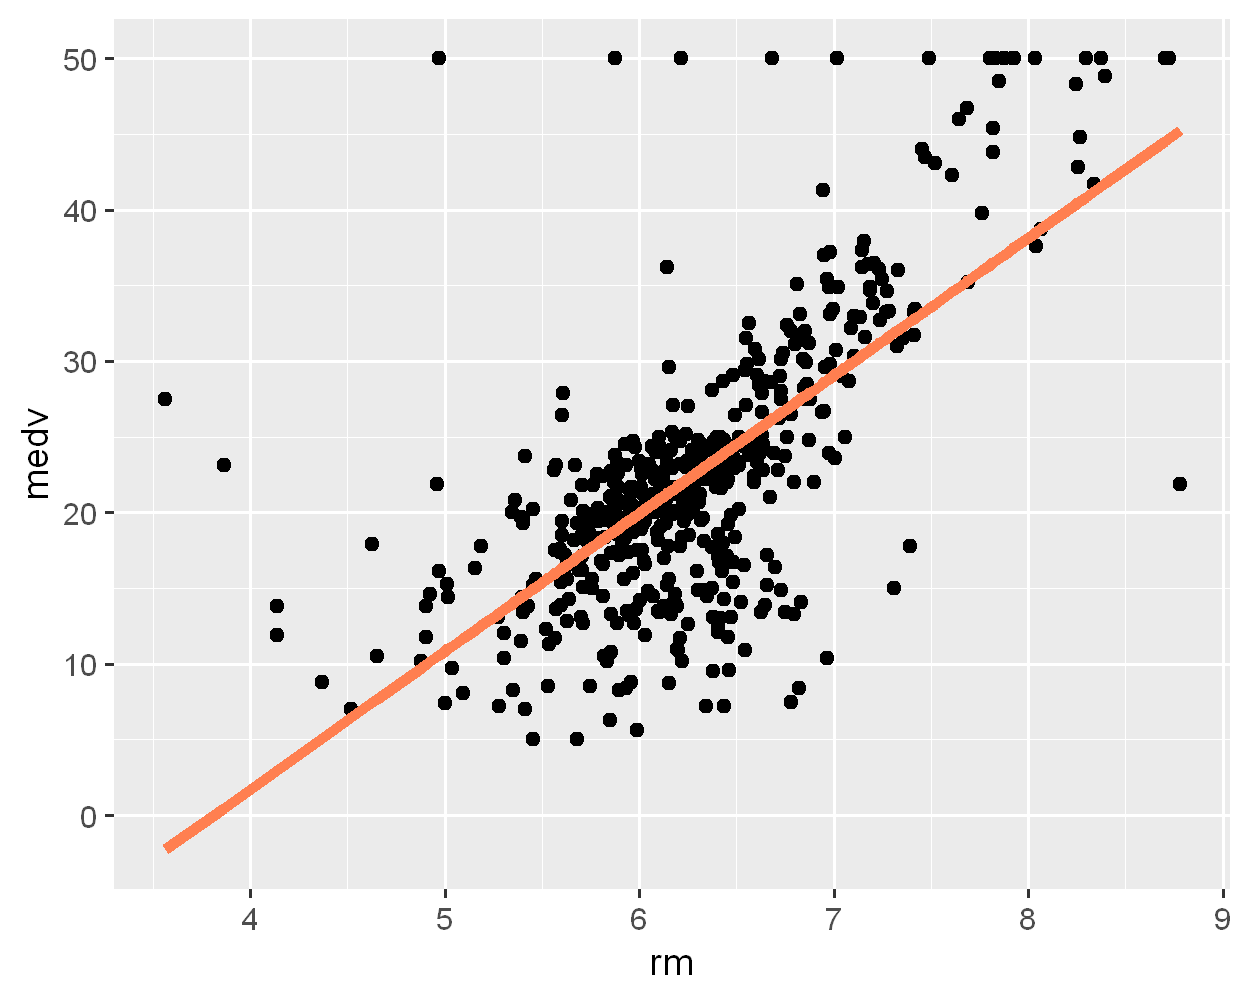

In [13]:
p = ggplot(Boston2, aes(x = rm)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

❓Does your model indicate a positive relationship beteen number of rooms and home value? 

**Answer:**

Yes the median home value increases at about $9,000 for each additional room. 

## Linear model with one categorical variable

We will use the `Carseats` data from the `ISLR2` package for the following exercise.

In [14]:
Carseats |> glimpse()

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


Below is a plot of `sales` versus `ShelveLoc`.

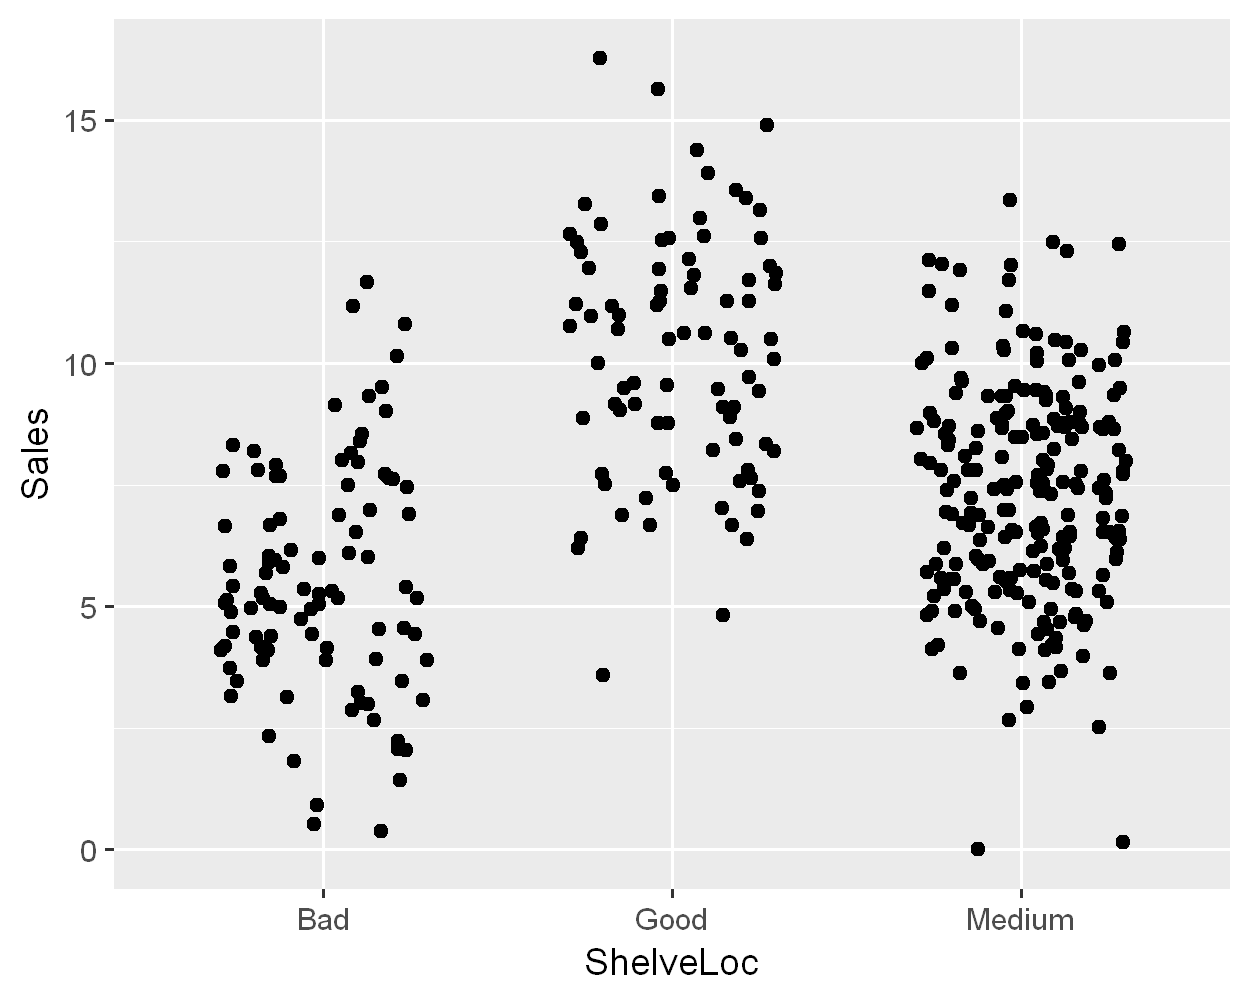

In [15]:
p = ggplot(Carseats, aes(x = ShelveLoc, y = Sales)) + 
    geom_point(position = position_jitter(width = 0.3, height = 0))

p

❓Does it look like a "Good" shelf location is associated with more car seat sales?

**Answer:**

Yes, there are a greater number of sells with good shelf location.

In cells below, using the `Carseats` data build a model of `Sales` with the `ShelveLoc` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

📊 *Here is some example code for plotting your model.*

```r
# The code below assumes your predictions column is called ".pred" and is in a
# data frame called "Carseats2"

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')
```

In [16]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


In [17]:
mod_fit = mod |> fit(Sales ~ ShelveLoc, data = Carseats)

mod_fit

parsnip model object


Call:
stats::lm(formula = Sales ~ ShelveLoc, data = data)

Coefficients:
    (Intercept)    ShelveLocGood  ShelveLocMedium  
          5.523            4.691            1.784  


In [18]:
Carseats2 = augment(mod_fit, Carseats)

glimpse(Carseats2)

Rows: 400
Columns: 13
$ .pred       <dbl> 5.522917, 10.214000, 7.306575, 7.306575, 5.522917, 5.52291…
$ .resid      <dbl> 3.97708333, 1.00600000, 2.75342466, 0.09342466, -1.3729166…
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct

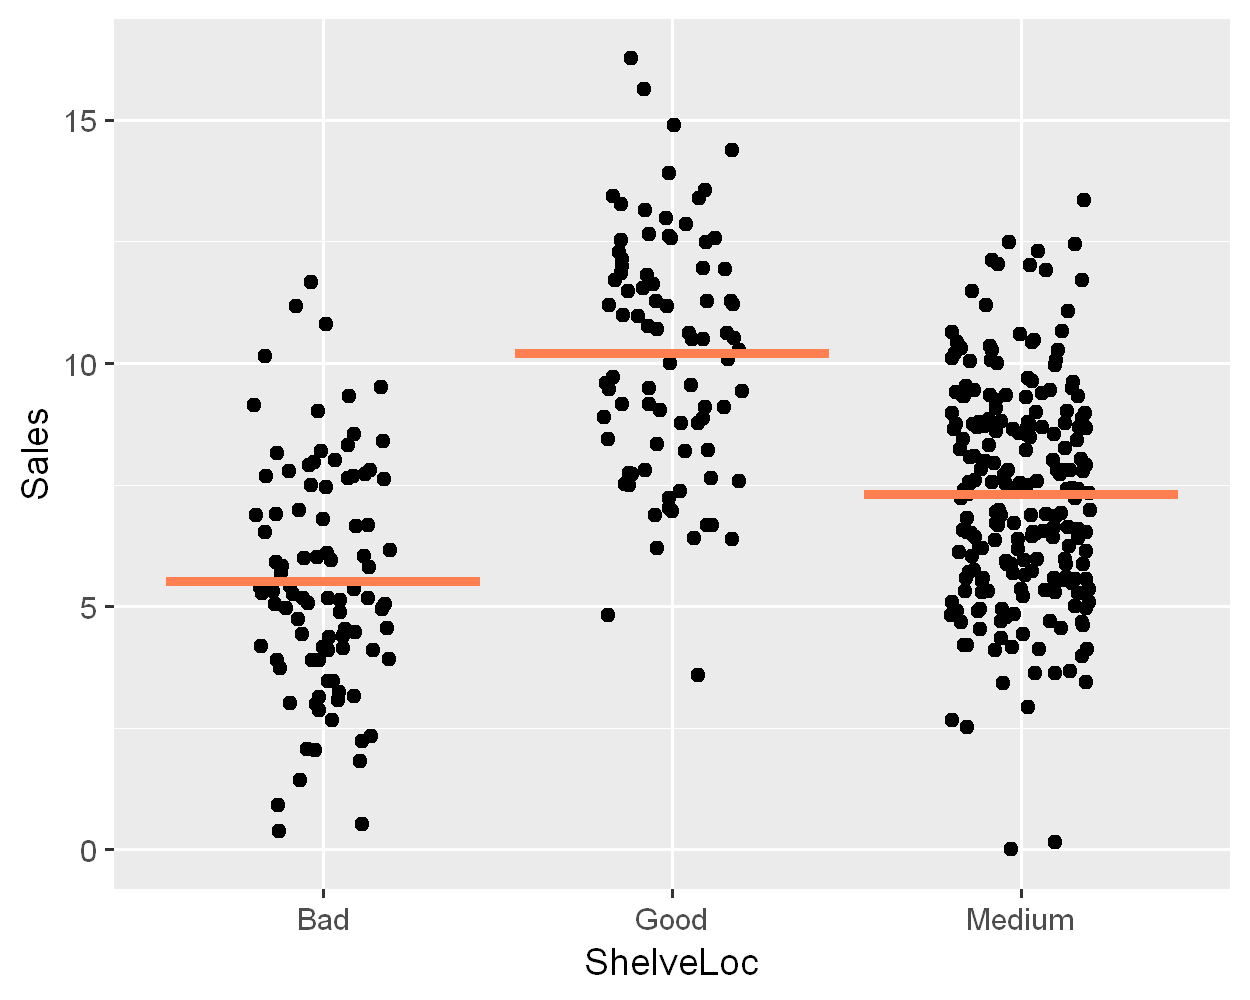

In [19]:
ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

Which `ShelveLoc` category does your intercept term represent? 

**Answer:**

It represents the Bad ShelveLoc category.